## CSC 4850/6850 Machine Learning - Assignment 2

### 1. (20 points) Please illustrate the 𝑘-means algorithm on the dataset in Figure 1
<center><div style="width:25%; height:25%"> <img src="./Fig1_Dataset.jpg"> </div></center>

In [622]:
from sys import *
import os
import math
import matplotlib.pyplot as plt
import re

In [623]:
def euclidian_distance(x1, y1, x2, y2):
    return round(math.sqrt((x1 - x2)**2 + (y1 - y2)**2), 3)

In [624]:
def create_points(p, x, y):
    points = {}
    for i in range(len(p)):
        points.update({p[i]:(x[i],y[i])})
    return points

In [625]:
def calc_kmeans_distances(p, X, Y, x1, y1, x2, y2):
    D = {}
    for n,o in enumerate(p):
        x = X[n]
        y = Y[n]
        a = p[n]
        D1 = euclidian_distance(x, y, x1, y1)
        D2 = euclidian_distance(x, y, x2, y2)
        D.update({ a:(D1, D2) })
    return D

In [626]:
def groups(D, p, points):
    G1 = []
    G2 = []
    for n,o in enumerate(D):
        k = p[n]
        if D[k][0] < D[k][1]:
            G1.append(points[k])
        elif D[k][0] > D[k][1]:
            G2.append(points[k])
        else:
            G1.append(points[k])
    return G1, G2

In [627]:
def recalculate_centroids(G1, G2):
    Cx1 = []
    Cy1 = []
    Cx2 = []
    Cy2 = []
    for n in range(len(G1)):
        Cx1.append(G1[n][0])
        Cy1.append(G1[n][1])
    for o in range(len(G2)):
        Cx2.append(G2[o][0])
        Cy2.append(G2[o][1])
    C1 = (round((sum(Cx1)/len(Cx1)),3), round((sum(Cy1)/len(Cy1)),3))
    C2 = (round((sum(Cx2)/len(Cx2)),3), round((sum(Cy2)/len(Cy2)),3))
    return C1, C2

In [628]:
def check_stability(G1, G2):
    if len(G1) == len(G2):
        return True, 'Groups are stable. K-means complete.'
    else:
        return False, 'Groups are unstable. Recalculate centroids.'

In [629]:
def plot_kmeans(G1, G2, C1, C2):
    x = []
    y = []
    for i,o in enumerate(G1):
        x.append(G1[i][0])
        x.append(G2[i][0])
        y.append(G1[i][1])
        y.append(G2[i][1])

    plt.scatter(x, y, color='blue')
    plt.scatter(C1, C2, color='red')
    plt.show()

In [635]:
def K_means_Clustering(unstable, i, names, x, y, C1, C2):
    points = create_points(names, x, y)
    while (unstable == True):
        D = calc_kmeans_distances(names, x, y, C1[0], C1[1], C2[0], C2[1])
        G1, G2 = groups(D, names, points)
        C1, C2 = recalculate_centroids(G1, G2)
        stable, message = check_stability(G1, G2)
        print(f'Round: {i}')
        print('Points: ')
        for p in points:
            print(f'{p}: {points.get(p)}')

        print(f'\nDistances:')
        for d in D:
            print(f'{d}: {D.get(d)}')

        print(f'\nGroup 1: {G1}, length: {len(G1)}\nGroup 2: {G2}, length: {len(G2)}\n')
        print(f'Centroid 1: {C1}\nCentroid 2: {C2}\n')
        print(message)
        plot_kmeans(G1, G2, C1, C2)
        if stable == True:
            unstable = False
        else:
            print('------------------------------------------\n')
            i += 1

Round: 1
Points: 
a: (0, 7)
b: (1, 1)
c: (1, 6)
d: (1, 8)
e: (2, 5)
f: (2, 7)
g: (2, 8)
h: (3, 0)
i: (3, 6)
j: (3, 7)
k: (5, 3)
l: (6, 2)
m: (6, 4)
n: (7, 2)
o: (7, 3)
p: (7, 5)
q: (7, 8)
r: (8, 3)
s: (8, 4)
t: (9, 9)

Distances:
a: (7.616, 7.071)
b: (2.236, 9.22)
c: (6.325, 6.325)
d: (8.246, 6.0)
e: (5.099, 5.831)
f: (7.071, 5.099)
g: (8.062, 5.0)
h: (0.0, 8.944)
i: (6.0, 4.472)
j: (7.0, 4.123)
k: (3.606, 5.385)
l: (3.606, 6.083)
m: (5.0, 4.123)
n: (4.472, 6.0)
o: (5.0, 5.0)
p: (6.403, 3.0)
q: (8.944, 0.0)
r: (5.831, 5.099)
s: (6.403, 4.123)
t: (10.817, 2.236)

Group 1: [(1, 1), (1, 6), (2, 5), (3, 0), (5, 3), (6, 2), (7, 2), (7, 3)], length: 8
Group 2: [(0, 7), (1, 8), (2, 7), (2, 8), (3, 6), (3, 7), (6, 4), (7, 5), (7, 8), (8, 3), (8, 4), (9, 9)], length: 12

Centroid 1: (4.0, 2.75)
Centroid 2: (4.667, 6.333)

Groups are unstable. Recalculate centroids.


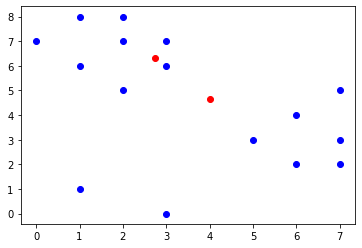

------------------------------------------

Round: 2
Points: 
a: (0, 7)
b: (1, 1)
c: (1, 6)
d: (1, 8)
e: (2, 5)
f: (2, 7)
g: (2, 8)
h: (3, 0)
i: (3, 6)
j: (3, 7)
k: (5, 3)
l: (6, 2)
m: (6, 4)
n: (7, 2)
o: (7, 3)
p: (7, 5)
q: (7, 8)
r: (8, 3)
s: (8, 4)
t: (9, 9)

Distances:
a: (5.836, 4.714)
b: (3.473, 6.472)
c: (4.423, 3.682)
d: (6.047, 4.028)
e: (3.01, 2.982)
f: (4.697, 2.749)
g: (5.618, 3.145)
h: (2.926, 6.549)
i: (3.4, 1.7)
j: (4.366, 1.795)
k: (1.031, 3.35)
l: (2.136, 4.533)
m: (2.358, 2.687)
n: (3.092, 4.921)
o: (3.01, 4.068)
p: (3.75, 2.687)
q: (6.047, 2.867)
r: (4.008, 4.714)
s: (4.191, 4.068)
t: (8.004, 5.088)

Group 1: [(1, 1), (3, 0), (5, 3), (6, 2), (6, 4), (7, 2), (7, 3), (8, 3)], length: 8
Group 2: [(0, 7), (1, 6), (1, 8), (2, 5), (2, 7), (2, 8), (3, 6), (3, 7), (7, 5), (7, 8), (8, 4), (9, 9)], length: 12

Centroid 1: (5.375, 2.25)
Centroid 2: (3.75, 6.667)

Groups are unstable. Recalculate centroids.


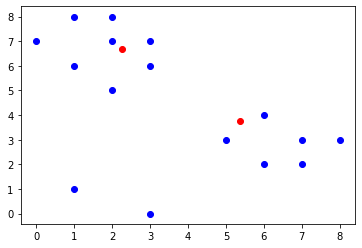

------------------------------------------

Round: 3
Points: 
a: (0, 7)
b: (1, 1)
c: (1, 6)
d: (1, 8)
e: (2, 5)
f: (2, 7)
g: (2, 8)
h: (3, 0)
i: (3, 6)
j: (3, 7)
k: (5, 3)
l: (6, 2)
m: (6, 4)
n: (7, 2)
o: (7, 3)
p: (7, 5)
q: (7, 8)
r: (8, 3)
s: (8, 4)
t: (9, 9)

Distances:
a: (7.173, 3.765)
b: (4.55, 6.299)
c: (5.762, 2.83)
d: (7.225, 3.056)
e: (4.354, 2.417)
f: (5.827, 1.781)
g: (6.667, 2.2)
h: (3.272, 6.709)
i: (4.439, 1.004)
j: (5.311, 0.821)
k: (0.839, 3.874)
l: (0.673, 5.181)
m: (1.858, 3.489)
n: (1.644, 5.687)
o: (1.79, 4.9)
p: (3.194, 3.653)
q: (5.975, 3.513)
r: (2.73, 5.613)
s: (3.155, 5.018)
t: (7.662, 5.745)

Group 1: [(1, 1), (3, 0), (5, 3), (6, 2), (6, 4), (7, 2), (7, 3), (7, 5), (8, 3), (8, 4)], length: 10
Group 2: [(0, 7), (1, 6), (1, 8), (2, 5), (2, 7), (2, 8), (3, 6), (3, 7), (7, 8), (9, 9)], length: 10

Centroid 1: (5.8, 2.7)
Centroid 2: (3.0, 7.1)

Groups are stable. K-means complete.


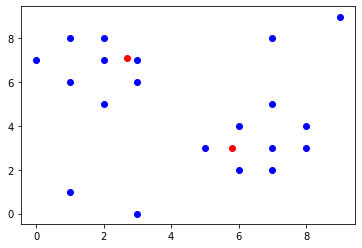

In [636]:
names = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t']
x = [0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 5, 6, 6, 7, 7, 7, 7, 8, 8, 9]
y = [7, 1, 6, 8, 5, 7, 8, 0, 6, 7, 3, 2, 4, 2, 3, 5, 8, 3, 4, 9]

K_means_Clustering(True, 1, names, x, y, [3, 0], [7, 8])

<hr>

### 2. (20 points) Given these data points, an agglomerative algorithm might decide on a clustering sequence as follows. 

### Show the clusters using agglomerative hierarchical clustering.

<center><div style="width:35%; height:35%"> <img src="./Fig2_Dataset.jpg"> </div></center>

In [713]:
def calc_agglomerative_distaces(pts):
    DM = {}
    for i in pts:
        for j in pts:
            d = euclidian_distance(pts.get(i)[0], pts.get(i)[1], pts.get(j)[0], pts.get(j)[1])
            if d == 0.0:
                pass
            else:
                DM.update({ f'{i}-{j}' : d })
    return DM

In [714]:
def get_distances(DM, n):
    for k, v in DM.items():
        if k.startswith(f'{n}-'):
            print(k, v)

In [736]:
names2 = [1, 2, 3, 4, 5, 6, 7]
x2 = [0.9, 0.28, 0.37, 0.56, 0.91, 0.2, 0.9]
y2 = [0.9, 0.68, 0.63, 0.07, 0.2, 0.17, 0.7]
mins = {}

points2 = create_points(names2, x2, y2)
D2 = calc_agglomerative_distaces(points2)